# Churn Prediction using Machine Learning

### Churn Prediction
A Machine Learning Model That Can Predict Customers Who Will Leave The Company

### The aim is to predict whether a bank's customers leave the bank or not. If the Client has closed his/her bank account, he/she has left.

In [1]:
!pip install catboost==1.2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install lightgbm==4.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install xgboost==3.0.3

ERROR: Ignored the following versions that require a different python version: 3.0.0 Requires-Python >=3.10; 3.0.0rc1 Requires-Python >=3.10; 3.0.1 Requires-Python >=3.10; 3.0.2 Requires-Python >=3.10; 3.0.3 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement xgboost==3.0.3 (from versions: 0.4a12, 0.4a13, 0.4a14, 0.4a15, 0.4a18, 0.4a19, 0.4a20, 0.4a21, 0.4a22, 0.4a23, 0.4a24, 0.4a25, 0.4a26, 0.4a27, 0.4a28, 0.4a29, 0.4a30, 0.6a1, 0.6a2, 0.7.post3, 0.7.post4, 0.71, 0.72.1, 0.80, 0.81, 0.82, 0.90, 1.0.0rc2, 1.0.0, 1.0.1, 1.0.2, 1.1.0rc1, 1.1.0rc2, 1.1.0, 1.1.1, 1.2.0rc2, 1.2.0, 1.2.1rc1, 1.2.1, 1.3.0rc1, 1.3.0.post0, 1.3.1, 1.3.2, 1.3.3, 1.4.0rc1, 1.4.0, 1.4.1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2, 1.6.0rc1, 1.6.0, 1.6.1, 1.6.2, 1.7.0.post0, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.7.5, 1.7.6, 2.0.0rc1, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4)
ERROR: No matching distribution found for xgboost==3.0.3

[notice] A new release of pip is 

In [10]:
# Install the xgboost package
!pip install xgboost

# Data handling and manipulation
import pandas as pd  # for dataframes and data analysis
import numpy as np   # for numerical operations

# Visualization
import seaborn as sns  # for statistical visualizations
import matplotlib.pyplot as plt  # for plotting
from matplotlib import pyplot  # redundant, same as plt (can be removed)

# Model evaluation and prediction tools
from sklearn.model_selection import cross_val_predict  # for cross-validation predictions
from sklearn.metrics import (  # for evaluation metrics
    confusion_matrix, 
    classification_report, 
    f1_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Machine learning models
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors
from sklearn.svm import SVC  # support vector classifier
from catboost import CatBoostClassifier  # CatBoost model (gradient boosting)
from sklearn.ensemble import GradientBoostingClassifier  # gradient boosting
from sklearn.tree import DecisionTreeClassifier  # decision tree
from sklearn.ensemble import RandomForestClassifier  # random forest
from lightgbm import LGBMClassifier  # LightGBM classifier
from xgboost import XGBClassifier  # XGBoost classifier

# Model selection and tuning
from sklearn.model_selection import train_test_split  # train/test data splitting
from sklearn.model_selection import KFold  # K-Fold cross-validation
from sklearn.model_selection import cross_val_score, GridSearchCV  # scoring and hyperparameter tuning

# Preprocessing
from sklearn import preprocessing  # for scaling, encoding, etc.

# Additional evaluation metric (duplicate recall_score above, can remove one)
from sklearn.metrics import accuracy_score, recall_score  # accuracy & recall scores

# Suppress warnings
import warnings  # to ignore unnecessary warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

# Jupyter-specific: high-res plot output
%config InlineBackend.figure_format = 'retina'

# Display full DataFrame content (all rows and columns)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 1.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [442]:
#reading the Data
df = pd.read_csv('churn.csv')

In [445]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [448]:
df.shape

(10000, 14)

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [454]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,500.95000,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,9500.05000,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [457]:
# categorical Variables
	# 1.	Categorical — either of object dtype.
	# 2.	Or low-cardinality — number of unique values ≤ 11.
	# 3.	And not the target column "Exited".
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [460]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['RowNumber', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

### Exited (Dependent Variable)

In [463]:
# Frequency of classes of dependent variable

df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [466]:
# Customers leaving the bank

churn=df.loc[df['Exited']==1] 

In [469]:
# Customers who did not leave the bank
not_churn=df.loc[df['Exited']==0]

### Categorical Variables

In [472]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_index()

Tenure
0     318
1     803
2     847
3     796
4     786
5     803
6     771
7     851
8     828
9     771
10    389
Name: count, dtype: int64

In [475]:
# Frequency of churn group according to Tenure
churn["Tenure"].value_counts().sort_index()

Tenure
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     213
10    101
Name: count, dtype: int64

### NumOfProducts

In [478]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_index()

NumOfProducts
1    3675
2    4242
3      46
Name: count, dtype: int64

In [481]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_index()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: count, dtype: int64

In [484]:
# Frequency of not_churn group according to HasCrCard

not_churn["HasCrCard"].value_counts().sort_index()

HasCrCard
0    2332
1    5631
Name: count, dtype: int64

In [487]:
# Frequency of churn group according to HasCrCard

churn["HasCrCard"].value_counts().sort_index()

HasCrCard
0     613
1    1424
Name: count, dtype: int64

### IsActiveMember

In [490]:
#Frequency of not_churn group according to IsActiveMember
not_churn["IsActiveMember"].value_counts().sort_index()

IsActiveMember
0    3547
1    4416
Name: count, dtype: int64

In [493]:
#Frequency of churn group according to IsActiveMember
churn["IsActiveMember"].value_counts().sort_index()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

### Geography

In [496]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_index()

Geography
France     4204
Germany    1695
Spain      2064
Name: count, dtype: int64

In [499]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_index()

Geography
France     810
Germany    814
Spain      413
Name: count, dtype: int64

### Gender

In [502]:
#Frequency of not_churn group according to Gender
not_churn.Gender.value_counts().sort_index()

Gender
Female    3404
Male      4559
Name: count, dtype: int64

In [505]:
#Frequency of churn group according to Gender
churn.Gender.value_counts().sort_index()

Gender
Female    1139
Male       898
Name: count, dtype: int64

### Numerical Variables

In [508]:
# 'CreditScore', 'Age', 'Balance', 'EstimatedSalary'


### CreditScore

In [511]:
# Let's examine the credit score of the not_churn group
not_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
5%        492.000000
25%       585.000000
50%       653.000000
75%       718.000000
90%       778.000000
95%       812.000000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

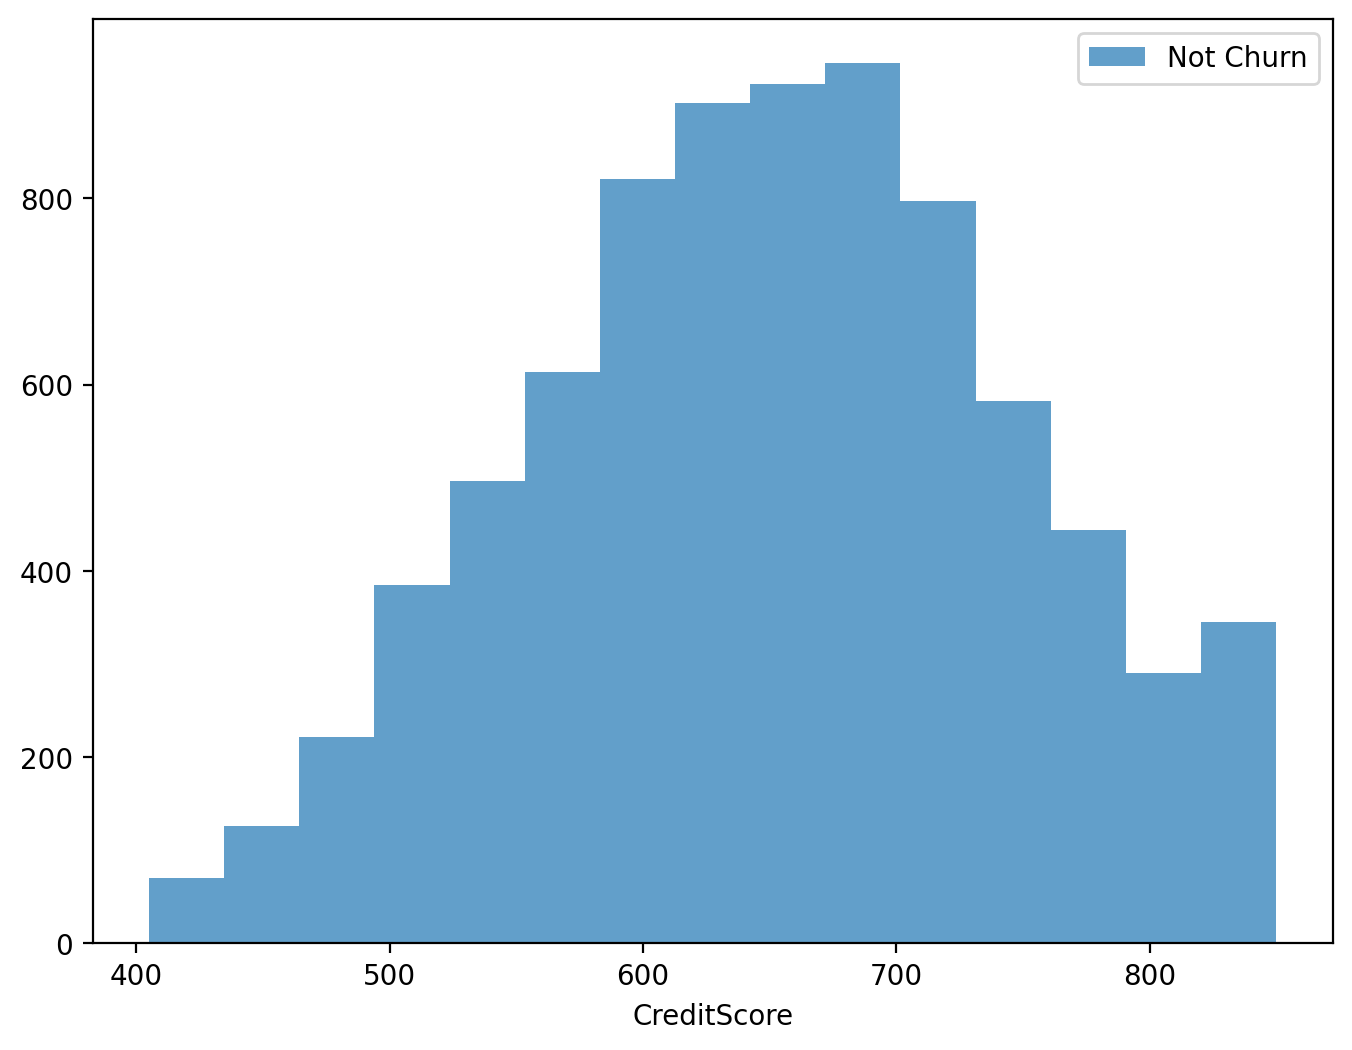

In [514]:
# distribution of the Credit Score for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [517]:
# Let's examine the credit score of the churn group
churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
5%        479.000000
25%       578.000000
50%       646.000000
75%       716.000000
90%       776.400000
95%       812.200000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

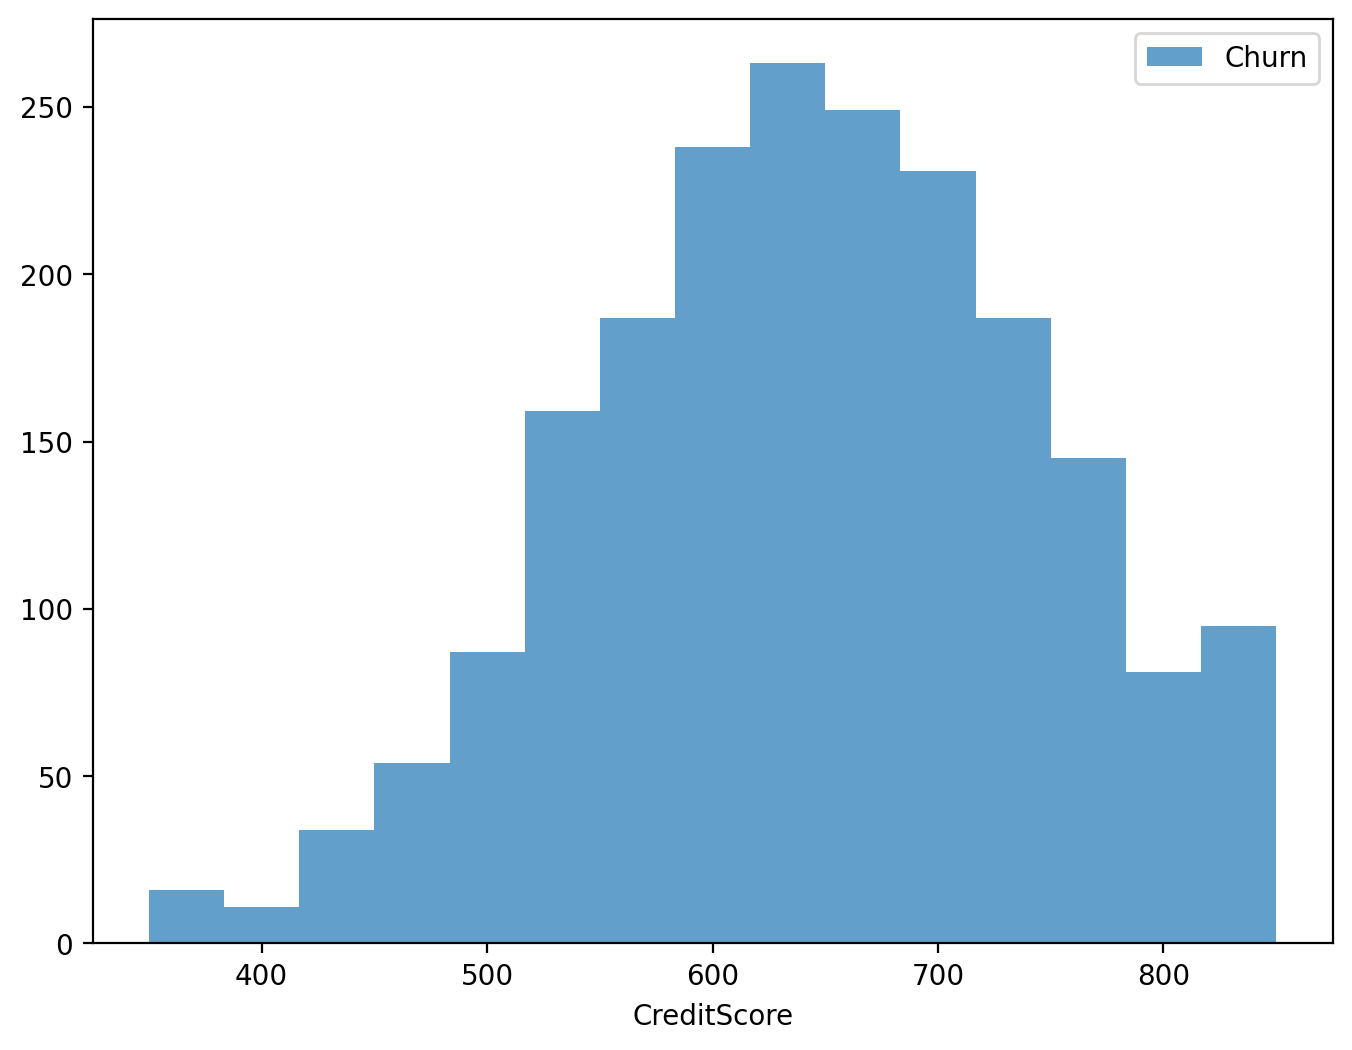

In [520]:
# distribution of the Credit Score for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(churn["CreditScore"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

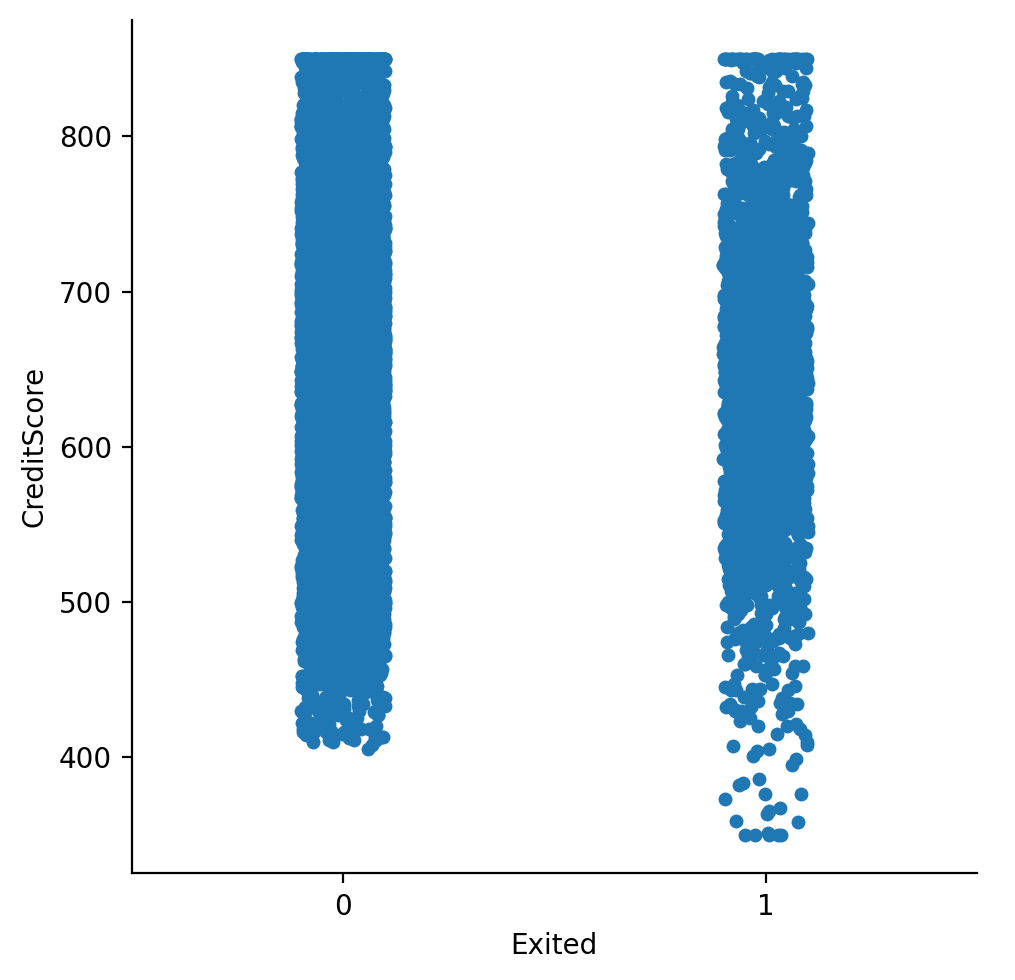

In [523]:
sns.catplot(x="Exited", y="CreditScore", data=df)

### Age

In [526]:
# examining the age of the not_churn group
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
5%         24.000000
25%        31.000000
50%        36.000000
75%        41.000000
90%        49.000000
95%        59.000000
99%        73.000000
max        92.000000
Name: Age, dtype: float64

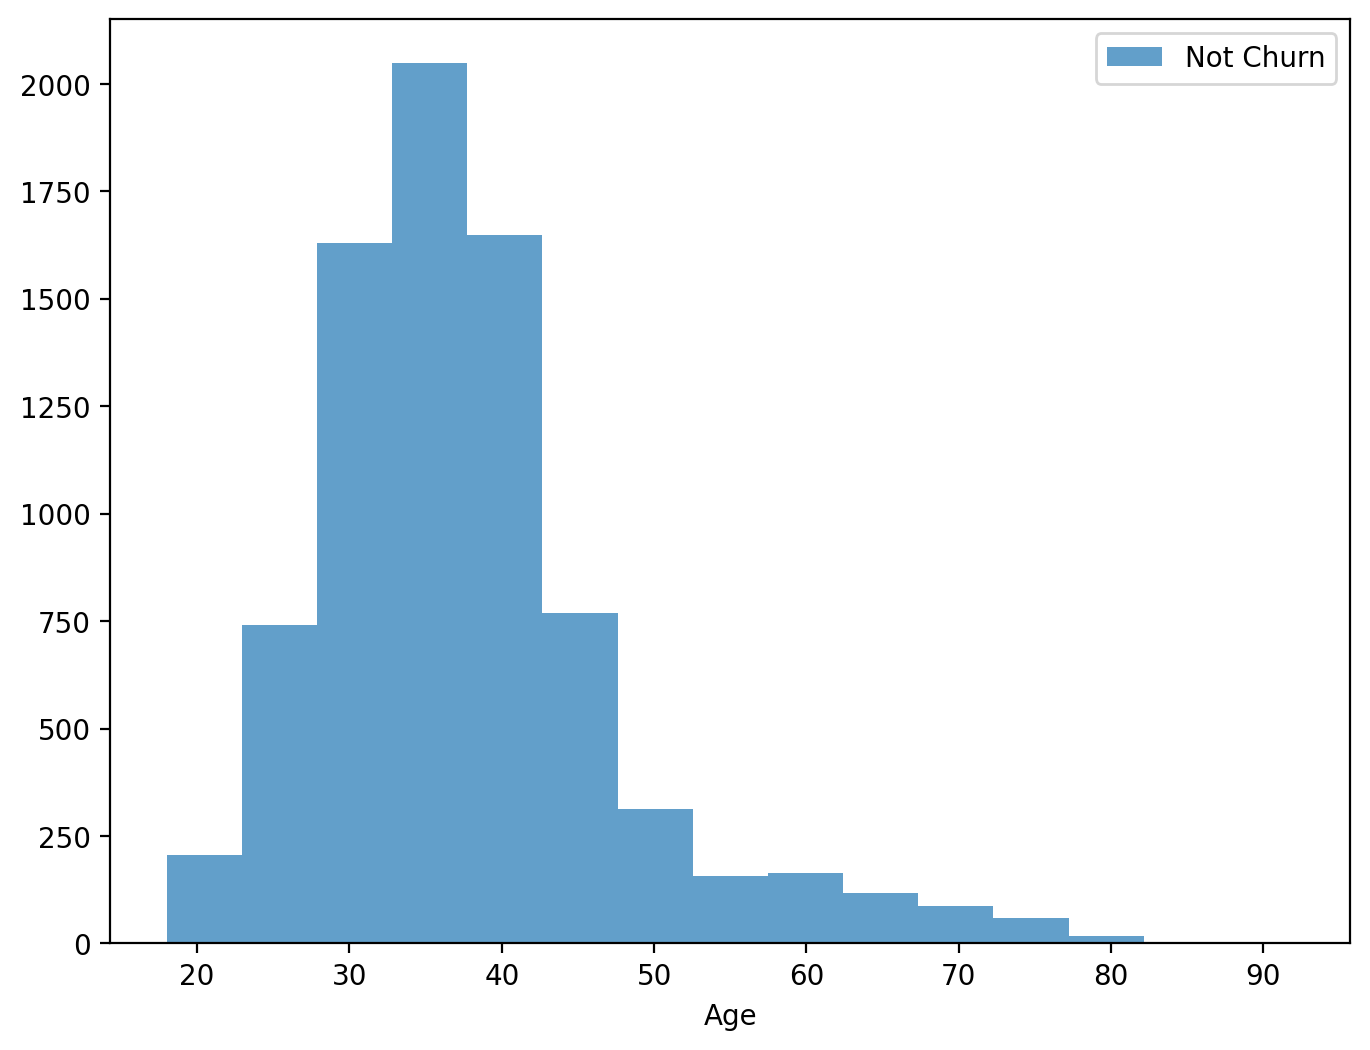

In [529]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [532]:
# examining the age of the churn group
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
5%         29.000000
25%        38.000000
50%        45.000000
75%        51.000000
90%        58.000000
95%        61.000000
99%        68.000000
max        84.000000
Name: Age, dtype: float64

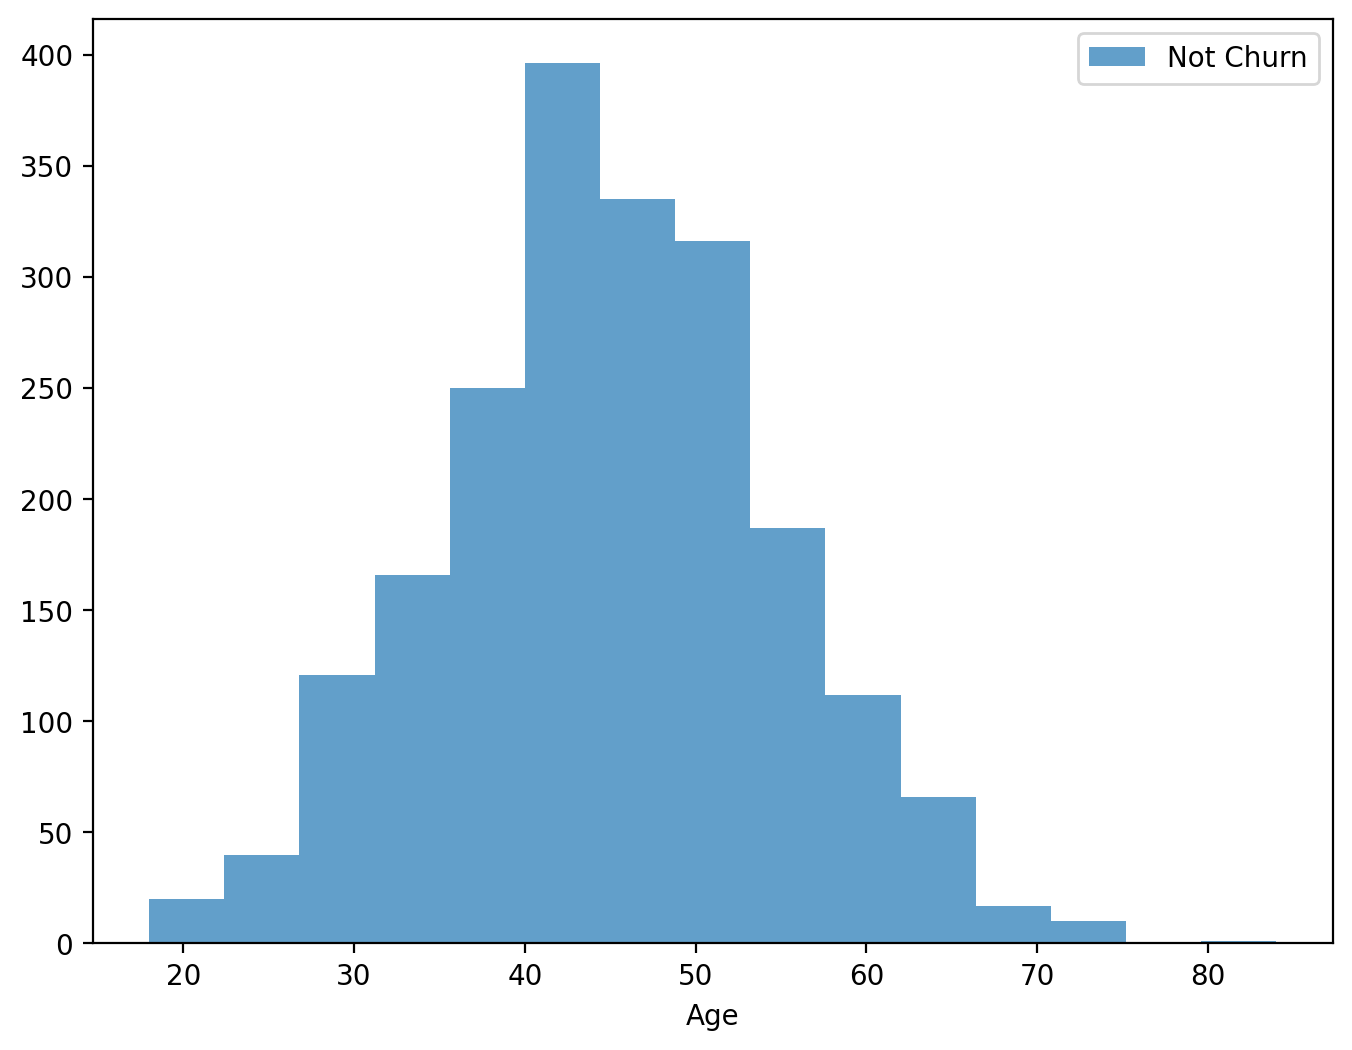

In [535]:
# distribution of the Age for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

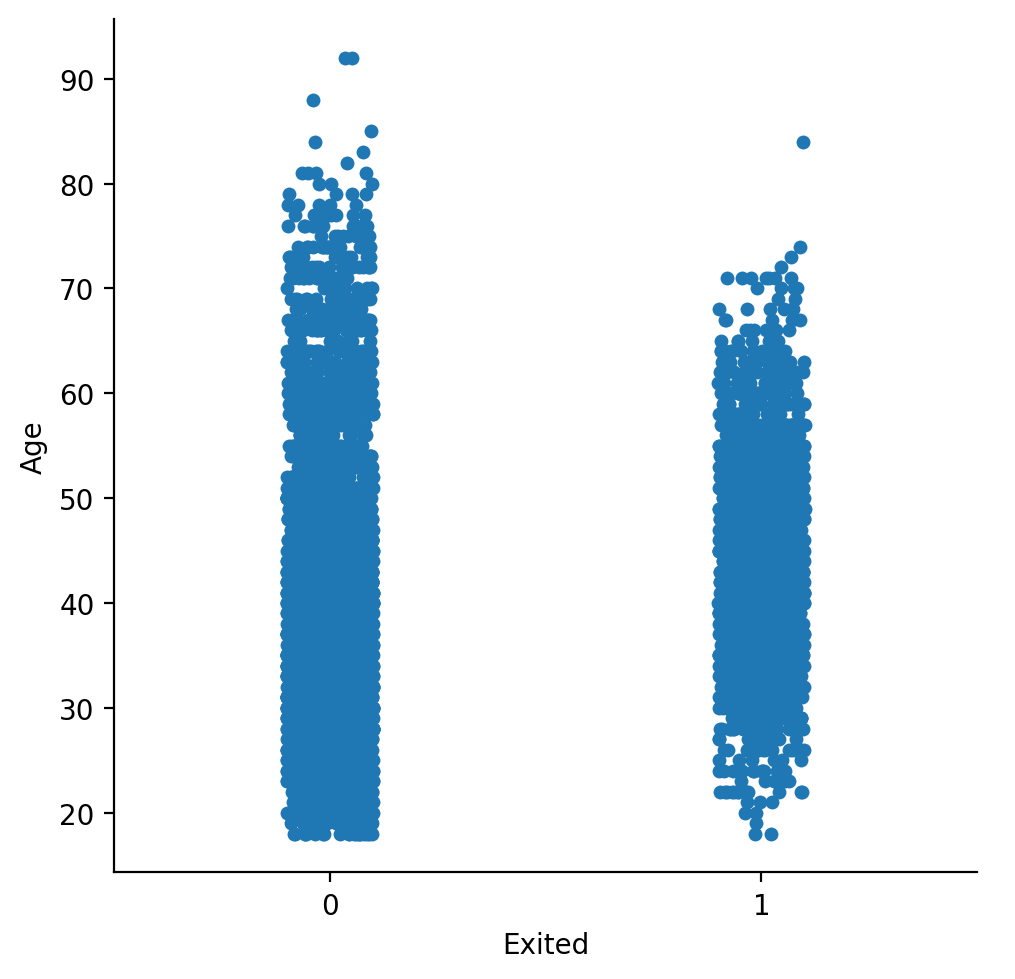

In [538]:
sns.catplot(x="Exited", y="Age", data = df)

### Balance

In [541]:
# examining the Balance of the not_churn group
not_churn['Balance'].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
5%            0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
90%      148730.298000
95%      161592.595000
99%      183753.906200
max      221532.800000
Name: Balance, dtype: float64

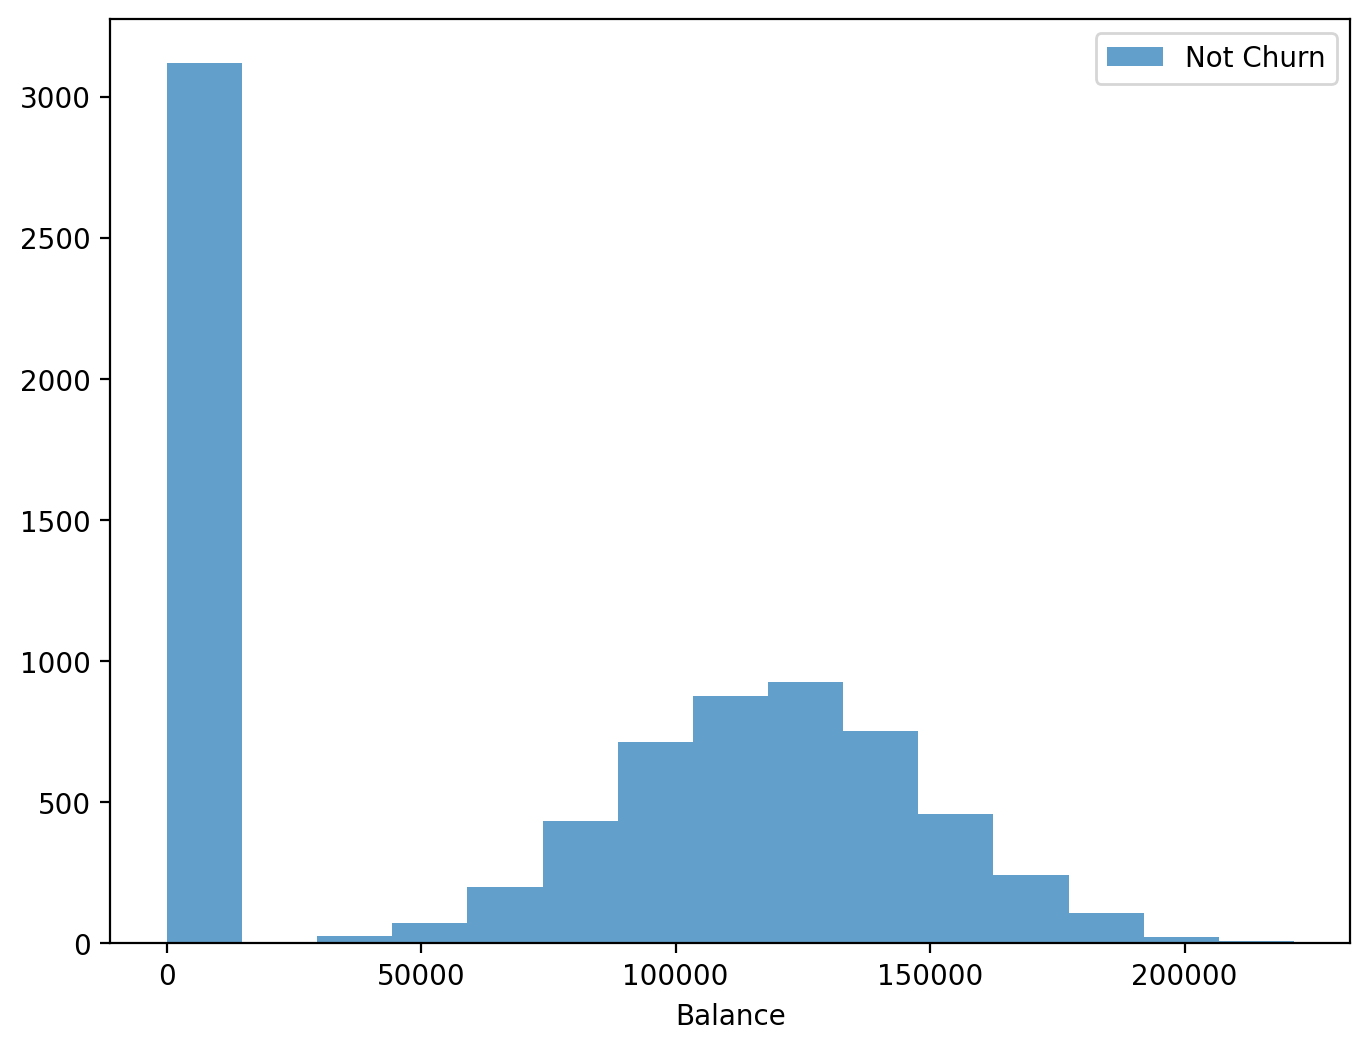

In [544]:
# distribution of the Balance for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(not_churn["Balance"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

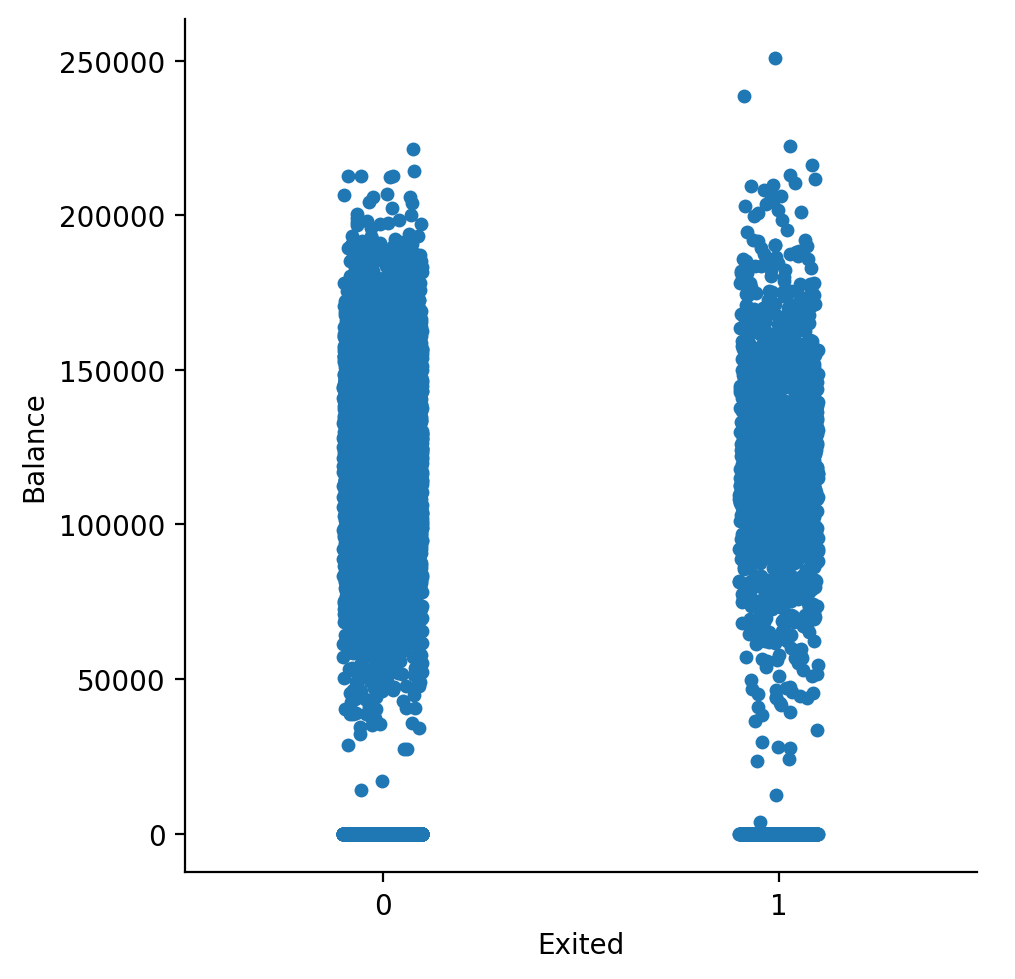

In [547]:
sns.catplot(x="Exited", y="Balance", data = df)

In [550]:
# examining the Balance of the churn group
churn['Balance'].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
5%            0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
90%      152080.618000
95%      167698.240000
99%      197355.288400
max      250898.090000
Name: Balance, dtype: float64

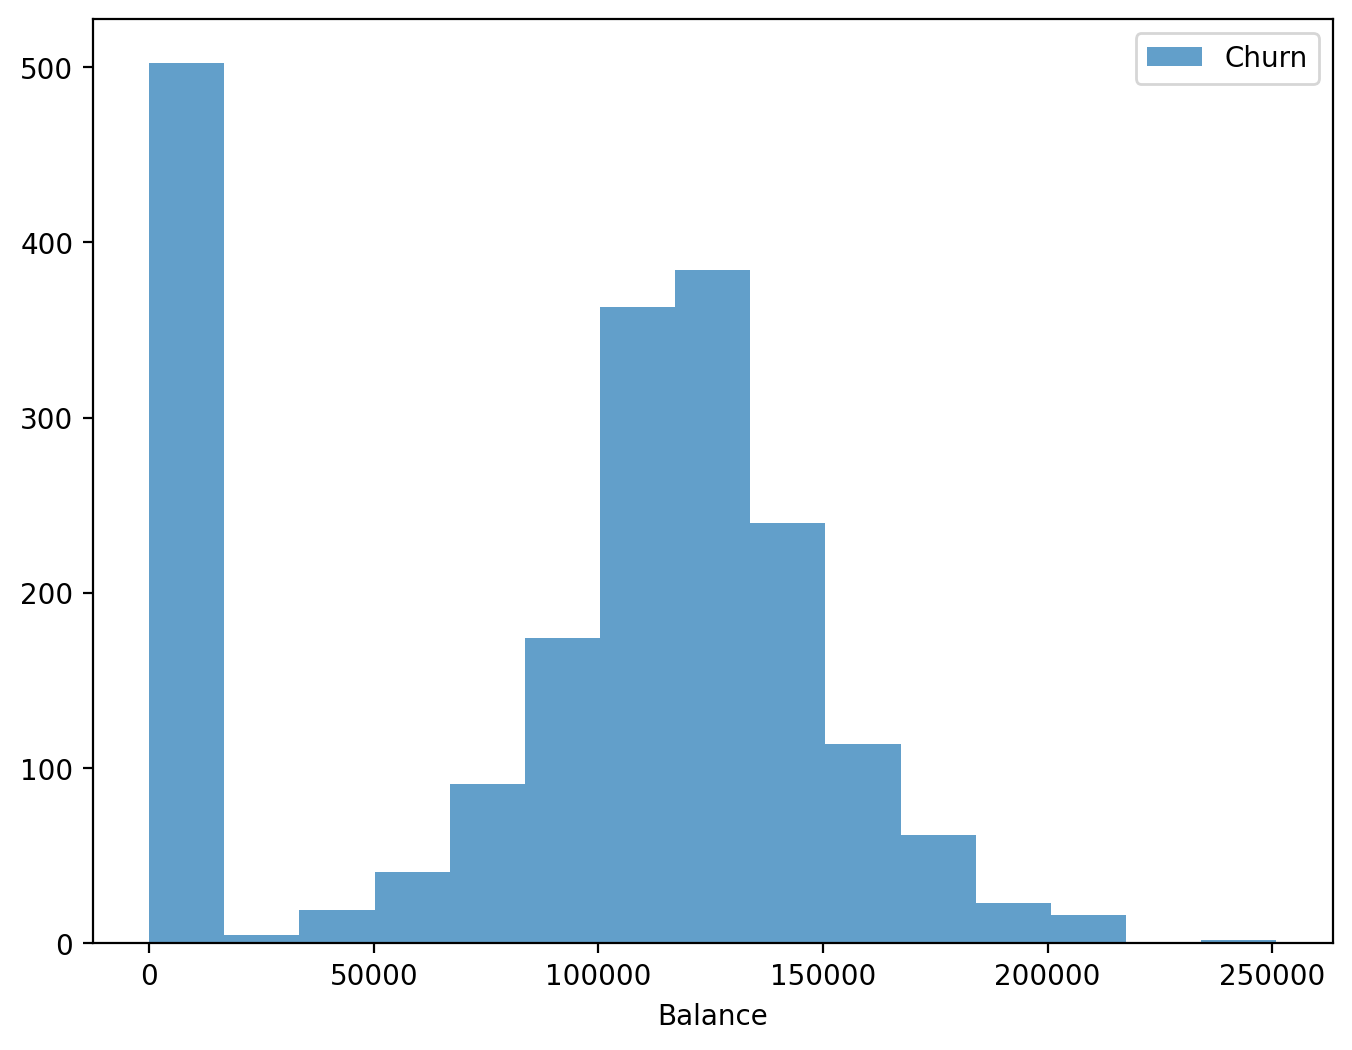

In [553]:
# distribution of the Balance for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(churn["Balance"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

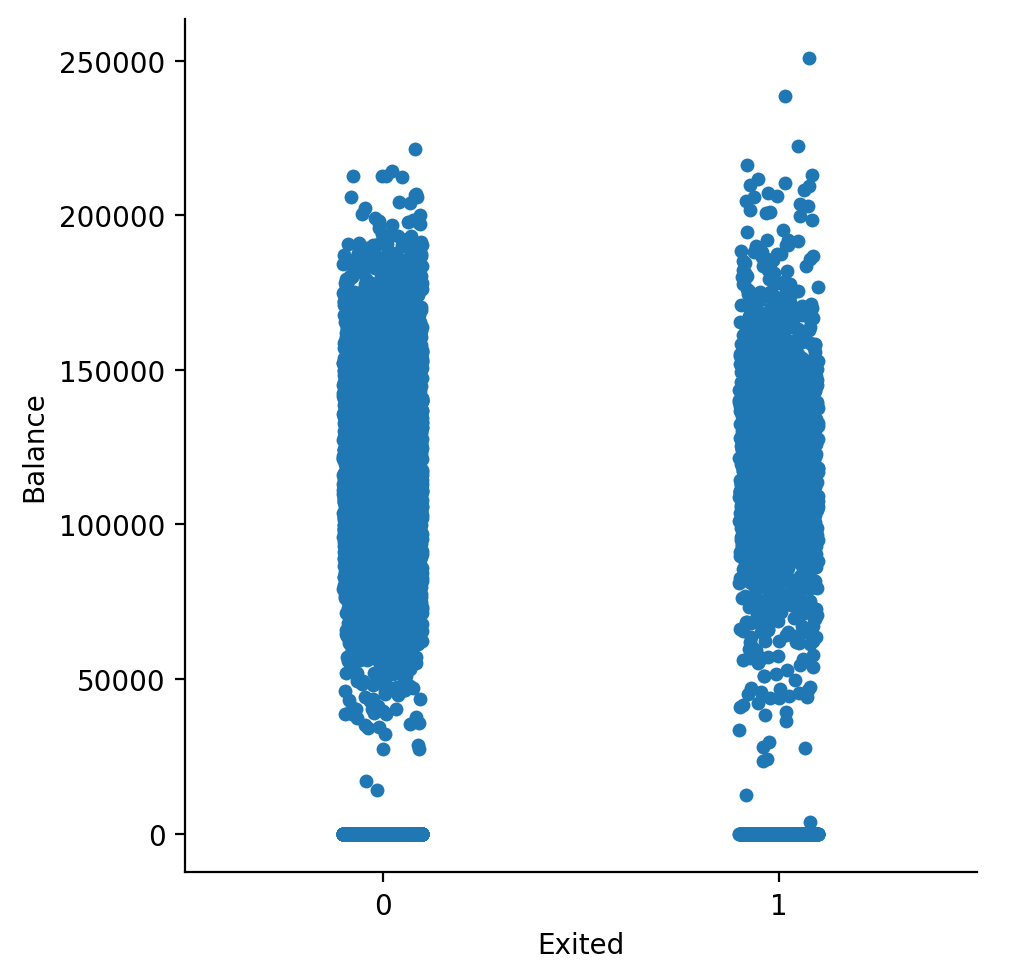

In [556]:
sns.catplot(x="Exited", y="Balance", data = df)

### EstimatedSalary

In [559]:
# examining the EstimatedSalary of the not_churn group
not_churn['EstimatedSalary'].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
5%         9773.542000
25%       50783.490000
50%       99645.040000
75%      148609.955000
90%      179453.212000
95%      190107.557000
99%      198131.465200
max      199992.480000
Name: EstimatedSalary, dtype: float64

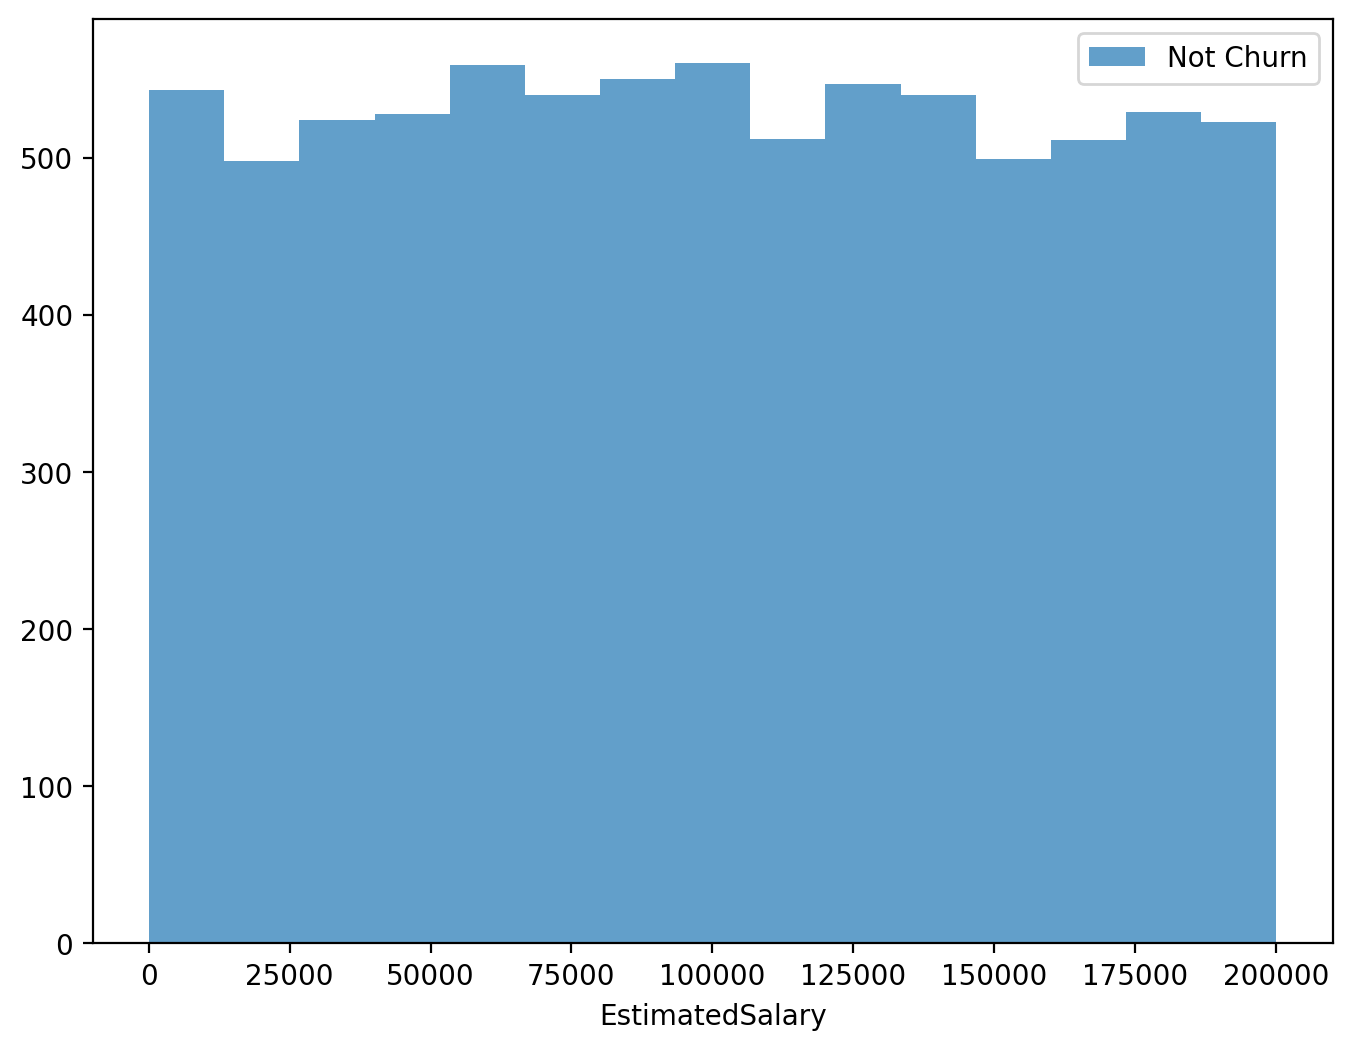

In [562]:
# distribution of the Balance for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [565]:
# examining the EstimatedSalary of the churn group
churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
5%        10030.760000
25%       51907.720000
50%      102460.840000
75%      152422.910000
90%      180169.390000
95%      190328.982000
99%      197717.297600
max      199808.100000
Name: EstimatedSalary, dtype: float64

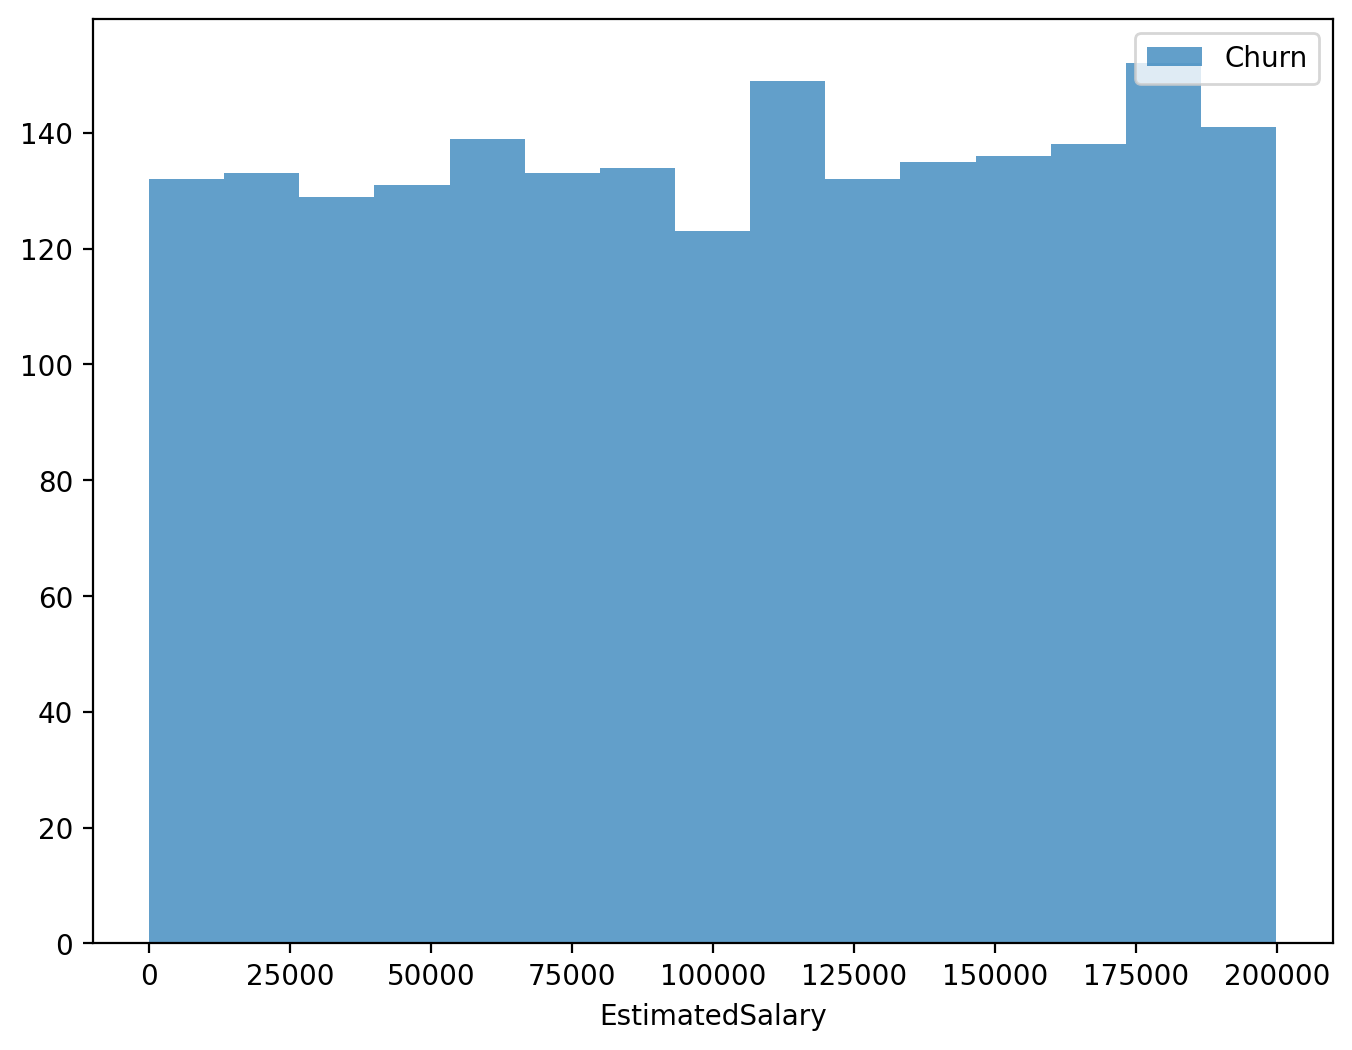

In [568]:
# distribution of the EstimatedSalary for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(churn["EstimatedSalary"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

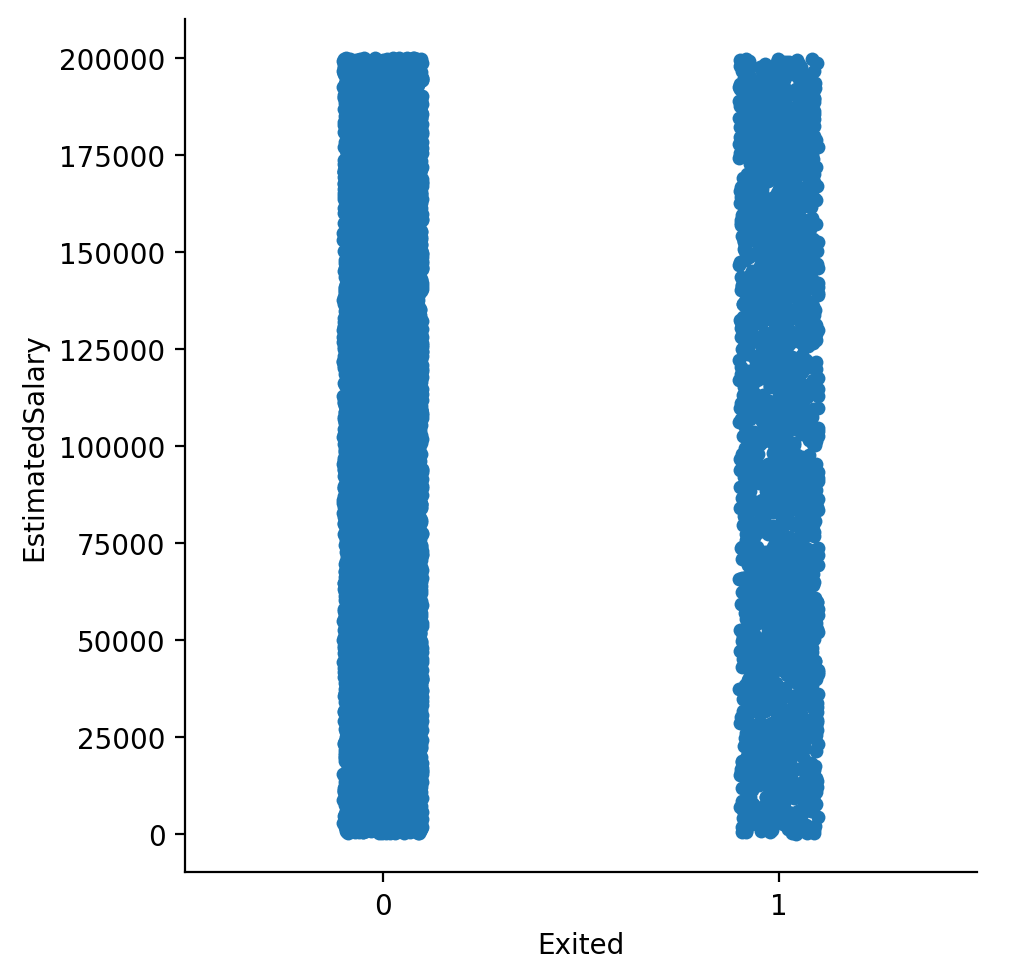

In [571]:
sns.catplot(x="Exited", y="EstimatedSalary", data = df)

### Correlation Matrix

<AxesSubplot: >

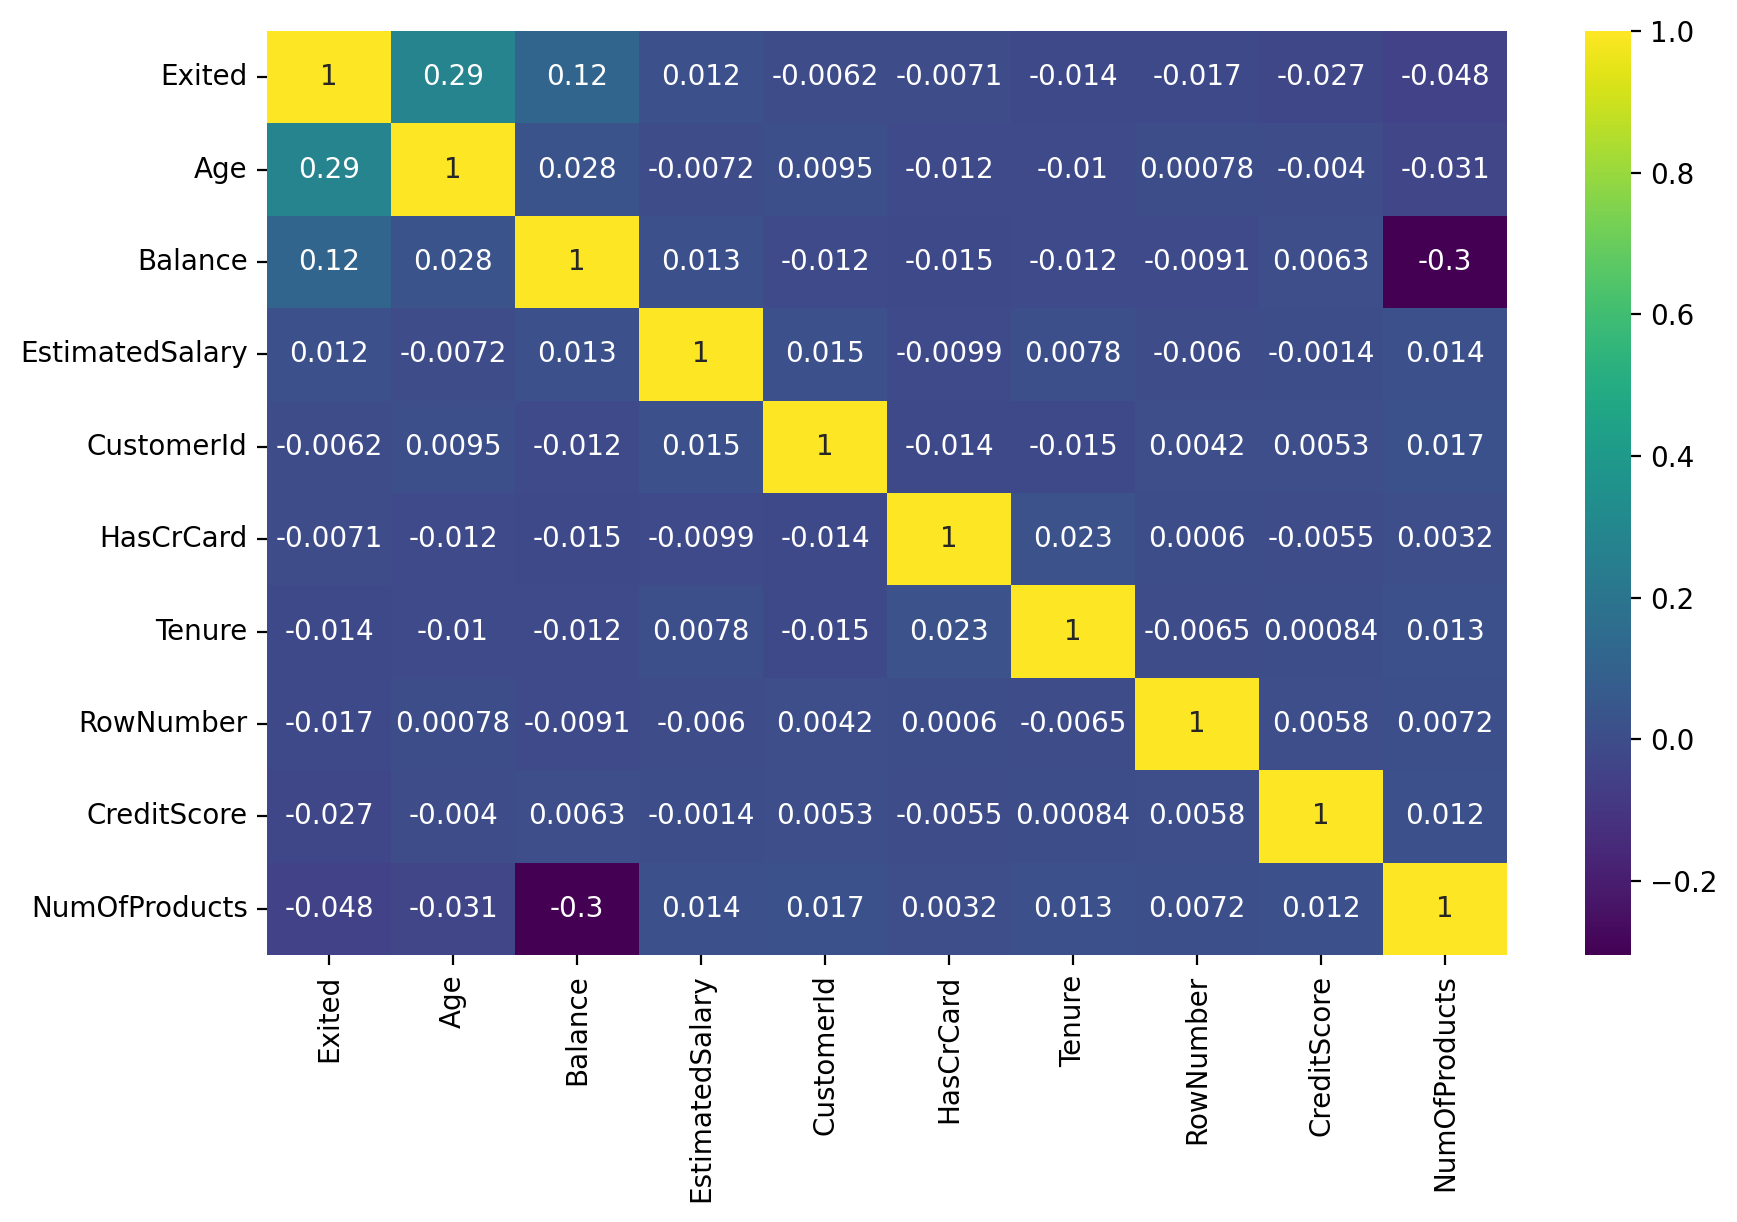

In [574]:
# Fixing the error by removing non-numeric columns before calculating the correlation matrix
# Dropping non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Exited correlation matrix
k=10
cols = numeric_df.corr().nlargest(k, 'Exited')['Exited'].index
cm = numeric_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### 2- Data Preprocessing

Missing Value

In [577]:
## Missing Observation Analysis
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Outliers

	•	dataframe → The dataset you’re analyzing.
	•	variable → The column in which you want to check for outliers.
	•	low_quantile (default 0.05) → The lower 5% quantile (like Q1 but here it’s 5th percentile instead of 25th).
	•	up_quantile (default 0.95) → The upper 95% quantile (like Q3 but here it’s 95th percentile instead of 75th).

### Step 1 – Get quantiles

	•	quantile_one = Value below which low_quantile × 100% of data lies.
	•	quantile_three = Value below which up_quantile × 100% of data lies.

Example:
If low_quantile = 0.05 and up_quantile = 0.95,
we get 5th percentile and 95th percentile values.

### Step 2 – Calculate the IQR

	•	IQR = difference between high quantile and low quantile.
	•	Measures how spread out the middle portion of the data is.

### Step 3 – Calculate limits

	•	Upper limit = Above this value → potential upper outlier.
	•	Lower limit = Below this value → potential lower outlier.
	•	The 1.5 × IQR rule is a common heuristic in statistics to detect points far from the central data.

### Step 4 – Return limits

	•	These values can then be used to flag or remove outliers.

💡 One small note:
Normally, Tukey’s method uses Q1 (25%) and Q3 (75%), but here you’re using 5% and 95% quantiles — this makes it more tolerant and detects fewer outliers, which can be useful if your data is naturally skewed.

In [580]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

Step-by-step logic

### 	1.	Iterate through numeric columns

You loop through each numeric column in your DataFrame.

### 	2.	Get outlier thresholds

•	Uses your earlier outlier_thresholds function to get the lower and upper bounds.

### 	3.	Check if column has any outliers

•	Creates a boolean mask for values above up_limit or below low_limit.
•	.any(axis=None) checks if any value in that column matches the condition.

### 	4.	Count outliers

	•	Filters the DataFrame to keep only outlier rows for that column.
	•	.shape[0] gives the number of outlier rows.

	5.	Print results

•	Shows how many outliers exist for the column.

### 	6.	Optional plotting

•	If plot=True, it draws a boxplot so you can visually see the outliers.

In [583]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [586]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

RowNumber has  None Outliers
CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


# Feature Engineering

### 1. Tenure relative to Age

	•	Creates a ratio: how much of the customer’s life they’ve been with the company.
	•	Higher value → joined younger or stayed longer.

### 2. Credit Score buckets

	•	pd.qcut → quantile-based binning (splits data into equal-sized groups by distribution).
	•	6 bins → each gets ~16.7% of the customers.
	•	Labels 1 to 6 → categorical credit score tiers.

### 3. Age buckets

	•	Splits Age into 8 equally sized groups (by distribution, not range).
	•	Younger customers get lower labels, older get higher.

### 4. Balance buckets (ranked first)

	•	First rank(method="first") assigns a unique rank to each row (important if many people have the same balance).
	•	Then divides into 5 equal-sized balance groups.

### 5. Estimated Salary buckets

	•	Splits salary into 10 quantile-based categories (each ~10% of customers).
	•	Labels indicate salary tier.

✅ Why this is done:
	•	Many ML models (especially tree-based like Random Forest, XGBoost, CatBoost) handle numeric values well, but binning can sometimes reveal non-linear relationships.
	•	Ratios like Tenure / Age can capture more meaningful relationships than raw values.
	•	Binning also helps with reducing noise and grouping similar customers.

In [589]:
# we standardize tenure with age
df["NewTenure"] = df["Tenure"]/df["Age"]
df["NewCreditsScore"] = pd.qcut(df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["NewBalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [592]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4


# One Hot Encoding

In [595]:
# Check the columns of the dataframe to ensure 'Gender' and 'Geography' are present
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'NewTenure',
       'NewCreditsScore', 'NewAgeScore', 'NewBalanceScore',
       'NewEstSalaryScore'],
      dtype='object')


In [598]:
# Variables to apply one-hot encoding
cat_cols = ["Gender", "Geography"]

# Apply one-hot encoding only to columns that exist
cat_cols = [col for col in cat_cols if col in df.columns]

if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # Convert any boolean columns to integers (0/1)
    df = df.astype({col: int for col in df.select_dtypes(bool).columns})
else:
    print("No columns found for one-hot encoding.")

In [601]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,0,0,1


# Scalling

In [604]:
# Removing variables that will not affect the dependent variable
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [607]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,0,0,1


### Function definition

	•	variable here is expected to be a Pandas Series (one column from your DataFrame).
	•	The goal is to scale values in a way that is less sensitive to outliers than standard z-score normalization.

### Step 1 – Median

var_median = variable.median()

	•	Finds the median of the variable.
	•	In robust scaling, we use the median instead of the mean because the median is less affected by extreme values (outliers).

### Step 2 – First quartile (Q1)

quartile1 = variable.quantile(0.25)

	•	Finds the 25th percentile (Q1) → the value below which 25% of the data falls.

### Step 3 – Third quartile (Q3)

quartile3 = variable.quantile(0.75)

	•	Finds the 75th percentile (Q3) → the value below which 75% of the data falls.

### Step 4 – Interquartile Range (IQR)

interquantile_range = quartile3 - quartile1

	•	IQR measures the spread of the middle 50% of the data:
                 IQR = Q3 − Q1.

### Step 5 – If IQR is zero

if int(interquantile_range) == 0:

	•	This checks if IQR is zero (converted to integer).
	•	IQR being zero means all values between Q1 and Q3 are the same, which can happen if the variable has little variation.

### Step 6 – Fallback to wider quantiles

quartile1 = variable.quantile(0.05)
quartile3 = variable.quantile(0.95)
interquantile_range = quartile3 - quartile1

	•	Instead of Q1/Q3, use 5th percentile and 95th percentile — a wider range — to avoid division by zero.

### Step 7 – If IQR is still zero

if int(interquantile_range) == 0:
    quartile1 = variable.quantile(0.01)
    quartile3 = variable.quantile(0.99)
    interquantile_range = quartile3 - quartile1

	•	If the spread is still zero, use 1st percentile and 99th percentile.
	•	This is a last attempt to get some variation in the range.

### Step 8 – Scaling

z = (variable - var_median) / interquantile_range
return round(z, 3)

	•	The robust z-score formula:
                       z = \frac{X - \text{median}}{\text{IQR}}
	•	This centers data around 0 and scales by IQR instead of standard deviation (less sensitive to outliers).
	•	Rounds results to 3 decimal places.

### Step 9 – Else case

If the initial IQR was not zero, we skip the fallback and scale directly:

else:
    z = (variable - var_median) / interquantile_range
return round(z, 3)

✅ Summary:
This function:
	1.	Calculates a robust z-score using median & IQR.
	2.	If IQR is zero, it widens the range to avoid division by zero.
	3.	Returns scaled values rounded to 3 decimal places.
	4.	Robust scaling like this is good when your data has outliers because it’s less sensitive than standard scaling.

In [610]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [613]:
new_cols_ohe = ["Gender_Male","Geography_Germany","Geography_Spain"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [616]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
0,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,-0.217,3,6,1,6,0,0,0
1,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,-0.279,2,6,3,6,0,0,1
2,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0.164,1,6,5,6,0,0,0
3,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,-0.276,5,5,1,5,0,0,0
4,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,-0.220,6,6,4,4,0,0,1


# 3- Modeling

In [619]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [622]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

In [625]:
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('SVR', SVC(gamma='auto',random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state=123456))]

In [628]:
results = []
names = []

In [634]:
from sklearn.model_selection import KFold

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.825500 (0.008652)
KNN: 0.820900 (0.009648)
CART: 0.790600 (0.011047)
RF: 0.861900 (0.008324)
SVR: 0.845200 (0.008195)
GB: 0.865000 (0.008426)
[LightGBM] [Info] Number of positive: 1832, number of negative: 7168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203556 -> initscore=-1.364218
[LightGBM] [Info] Start training from score -1.364218
[LightGBM] [Info] Number of positive: 1827, number of negative: 7173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

In [637]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[1520,  230],
       [  53,  197]])

In [640]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  197
True Negative :  1520
False Positive:  230
False Negative:  53


In [643]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1750
           1       0.46      0.79      0.58       250

    accuracy                           0.86      2000
   macro avg       0.71      0.83      0.75      2000
weighted avg       0.90      0.86      0.87      2000



## your generate_auc_roc_curve function is for plotting the AUC-ROC curve of a trained classifier.
Let’s go through it line by line so you see exactly what’s happening, and I’ll also point out a couple of things to make it safer to use.

In [646]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

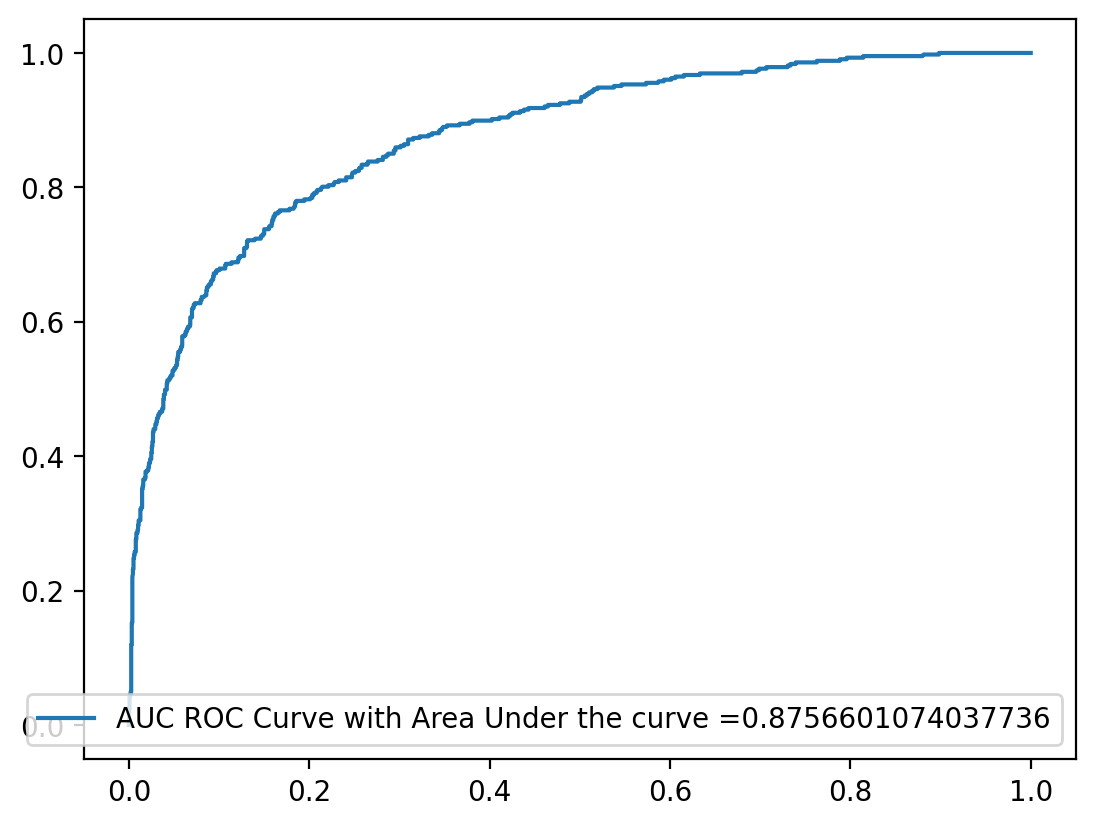

In [649]:
generate_auc_roc_curve(model_GB, X_test)

# 4- Model Tuning

In [652]:
# LightGBM: 
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

[LightGBM] [Info] Number of positive: 2037, number of negative: 7963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203700 -> initscore=-1.363328
[LightGBM] [Info] Start training from score -1.363328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [655]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

In [661]:
# Fixing the error by setting shuffle=True in KFold
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LightGBM] [Info] Number of positive: 1832, number of negative: 7168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203556 -> initscore=-1.364218
[LightGBM] [Info] Start training from score -1.364218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 1610, number of negative: 6390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201250 -> initscore=-1.378500
[LightGBM] [Info] Start training from score -1.378500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

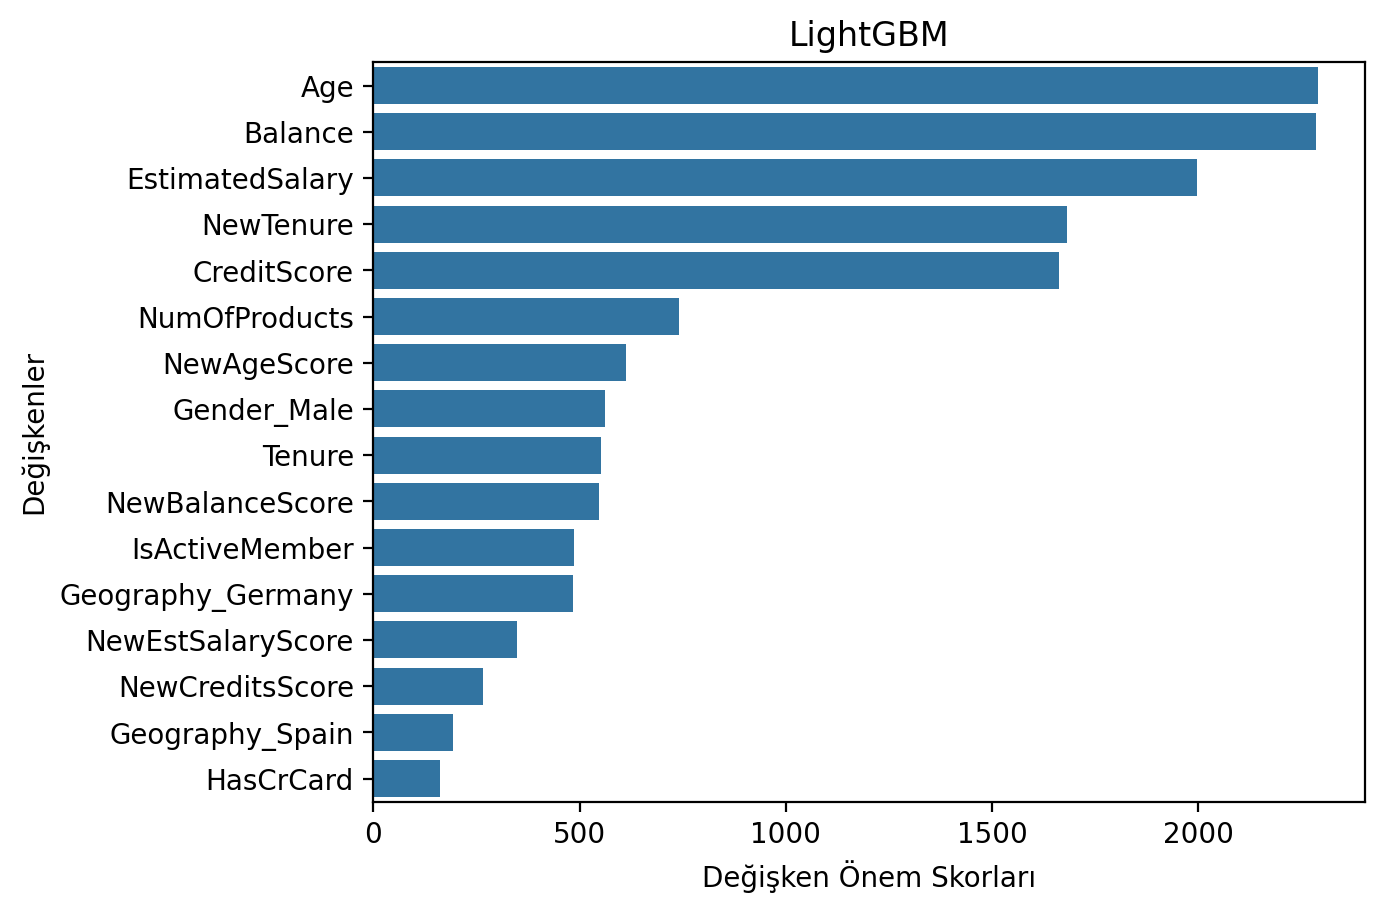

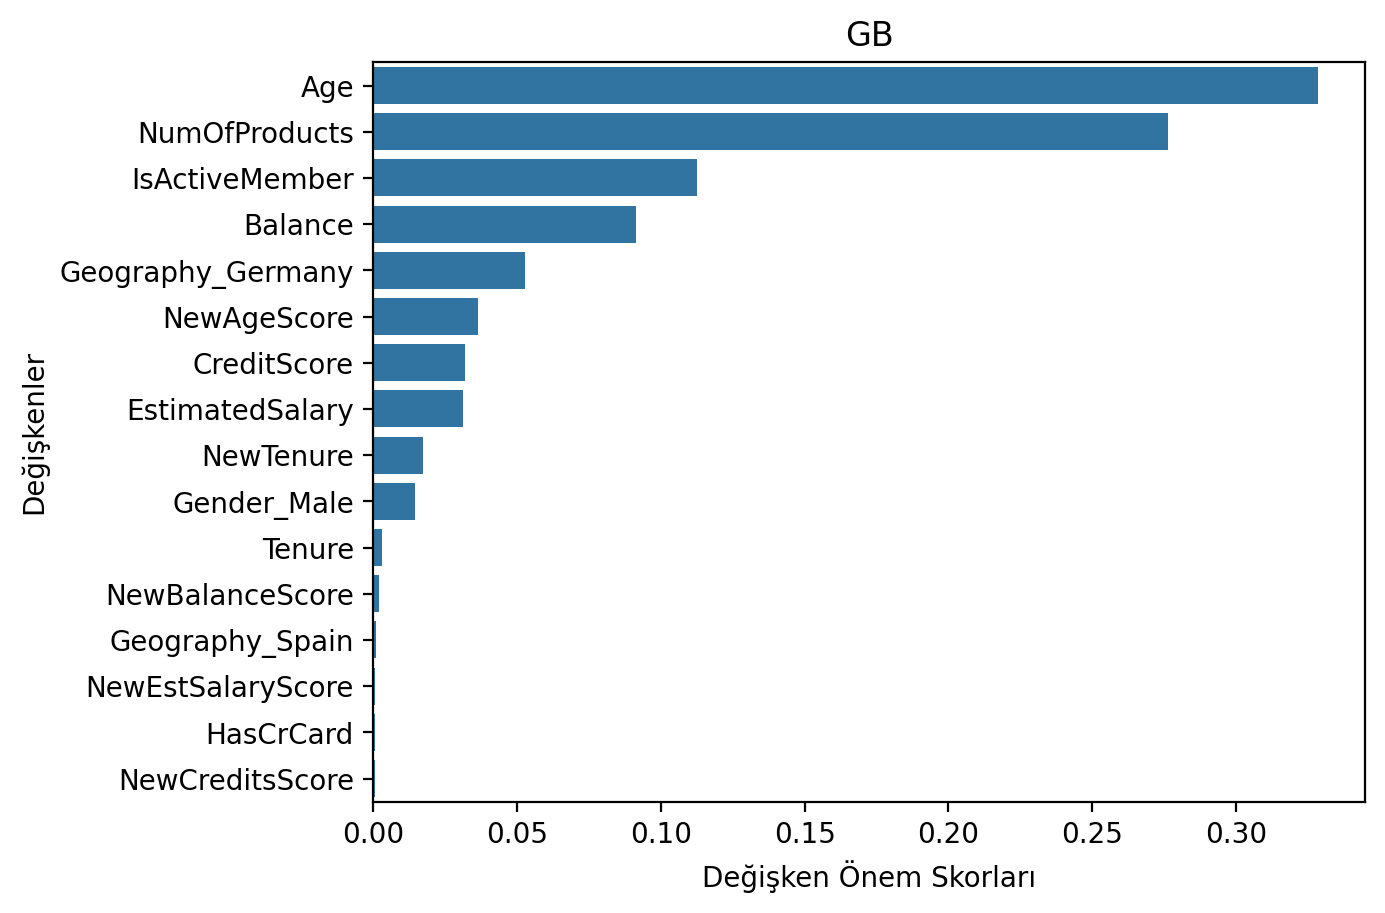

In [664]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

### Report

1) Churn Data Set read.

2) With Exploratory Data Analysis

4) During Model Buildingost

5) The model created as a result of LightGBM hyperparameter optimization (AUC 0.87)

In [667]:
import joblib
joblib.dump(lgbm_tuned, 'lgbm_tuned.pkl')

['lgbm_tuned.pkl']

In [670]:
joblib.dump(robust_scaler, 'robust_scaler.pkl')

['robust_scaler.pkl']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f1778971-5ba1-4174-87d1-c69236dcc675' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>